In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [5]:
data = pd.read_csv(r"C:\Users\DELL\2.Datasets\Womens_Clothing_E-Commerce_Reviews.csv")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [8]:
data=data.rename(columns={'Unnamed: 0' : 'ID'})

<AxesSubplot:xlabel='Age'>

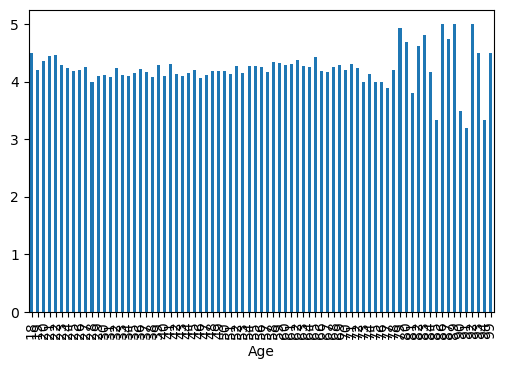

In [9]:
plt.figure(dpi=100)
data.groupby('Age')['Rating'].mean().plot(kind='bar')

In [10]:
data.isna().sum()

ID                            0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [11]:
data['customer_review']=''

def isNaN(obj):                                         # If an object is not equal to itself, it is a NaN.
    return obj != obj


def customer_review(row):
    if isNaN(row[0]) and isNaN(row[1]):
        return np.nan
    elif isNaN(row[0]):
        return str(row[1])
    elif isNaN(row[1]):
        return str(row[0])
    else:
        return str(row[0]) + ' ' + str(row[1])

data['customer_review'] = data[['Title','Review Text']].apply(customer_review,axis=1)
data.head(10)

ID  Clothing ID  Age                                 Title  \
0   0          767   33                                   NaN   
1   1         1080   34                                   NaN   
2   2         1077   60               Some major design flaws   
3   3         1049   50                      My favorite buy!   
4   4          847   47                      Flattering shirt   
5   5         1080   49               Not for the very petite   
6   6          858   39                  Cagrcoal shimmer fun   
7   7          858   39  Shimmer, surprisingly goes with lots   
8   8         1077   24                            Flattering   
9   9         1077   34                     Such a fun dress!   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   
5  I love tracy reese dresses, but this one is no...       2                0   
6  I aded this in my basket at hte last mintue to...       5                1   
7  I ordered this in carbon for store pick up, an...       4                1   
8  I love this dress. i usually get an xs but it ...       5                1   
9  I'm 5"5' and 125 lbs. i ordered the s petite t...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  \
0                        0       Initmates        Intimate  Intimates   
1                        4         General         Dresses    Dresses   
2                        0         General         Dresses    Dresses   
3                        0  General Petite         Bottoms      Pants   
4                        6         General            Tops    Blouses   
5                        4         General         Dresses    Dresses   
6                        1  General Petite            Tops      Knits   
7                        4  General Petite            Tops      Knits   
8                        0         General         Dresses    Dresses   
9                        0         General         Dresses    Dresses   

                                     customer_review  
0  Absolutely wonderful - silky and sexy and comf...  
1  Love this dress!  it's sooo pretty.  i happene...  
2  Some major design flaws I had such high hopes ...  
3  My favorite buy! I love, love, love this jumps...  
4  Flattering shirt This shirt is very flattering...  
5  Not for the very petite I love tracy reese dre...  
6  Cagrcoal shimmer fun I aded this in my basket ...  
7  Shimmer, surprisingly goes with lots I ordered...  
8  Flattering I love this dress. i usually get an...  
9  Such a fun dress! I'm 5"5' and 125 lbs. i orde...

In [12]:
data.drop(columns=['Title','Review Text'], inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Rating                   23486 non-null  int64 
 4   Recommended IND          23486 non-null  int64 
 5   Positive Feedback Count  23486 non-null  int64 
 6   Division Name            23472 non-null  object
 7   Department Name          23472 non-null  object
 8   Class Name               23472 non-null  object
 9   customer_review          22642 non-null  object
dtypes: int64(6), object(4)
memory usage: 1.8+ MB


In [13]:
# Treat missing values by DELETION

data.dropna(axis = 0, inplace = True, subset = ['customer_review','Division Name','Department Name','Class Name'])

In [14]:
data.isna().sum()

ID                         0
Clothing ID                0
Age                        0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
customer_review            0
dtype: int64

In [15]:
positive=0
negative=0
neutral=0

positive_list=[]
negative_list=[]

SID_object = SentimentIntensityAnalyzer()

review_list=list(data['customer_review'].values)

for i in range(len(review_list)):
    sentiment_dict = SID_object.polarity_scores(review_list[i])
    if(sentiment_dict['pos'] > sentiment_dict['neg']):
        positive += 1
        positive_list.append(review_list[i])
    elif(sentiment_dict['pos'] < sentiment_dict['neg']):
        negative += 1
        negative_list.append(review_list[i])
    else:
        neutral += 1

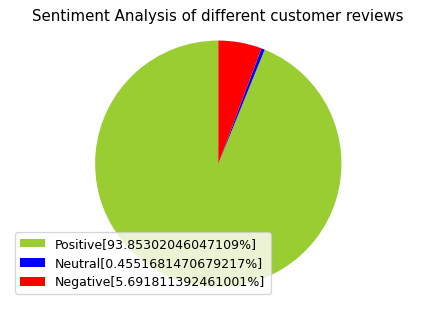

In [16]:
def percentage(part,total):
    return (part/total)*100
positive_percent = percentage(positive,len(data))
negative_percent = percentage(negative,len(data))
neutral_percent = percentage(neutral,len(data))

# Create Pie-chart

plt.figure(dpi=90)
labels = ['Positive['+str(positive_percent)+'%]', 'Neutral['+str(neutral_percent)+'%]', 'Negative['+str(negative_percent)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen','blue','red']
patches,texts = plt.pie(sizes, colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title('Sentiment Analysis of different customer reviews')
plt.axis('equal')
plt.show()

In [19]:
#Function to Create Wordcloud
def create_wordcloud(text):
    stopwords = set(STOPWORDS)
    wc = WordCloud(width=1500,
                   height=750,
                   background_color="white",
                   max_words=3000,
                   stopwords=stopwords,
                   repeat=True)
    wc.generate(str(text))
    wc.to_file(r"C:\Users\DELL\Pictures\positive_reviews.jpg")
    print("Word Cloud Saved Successfully")
    path=r"C:\Users\DELL\Pictures\positive_reviews.jpg"
    display(Image.open(path))

Word Cloud Saved Successfully


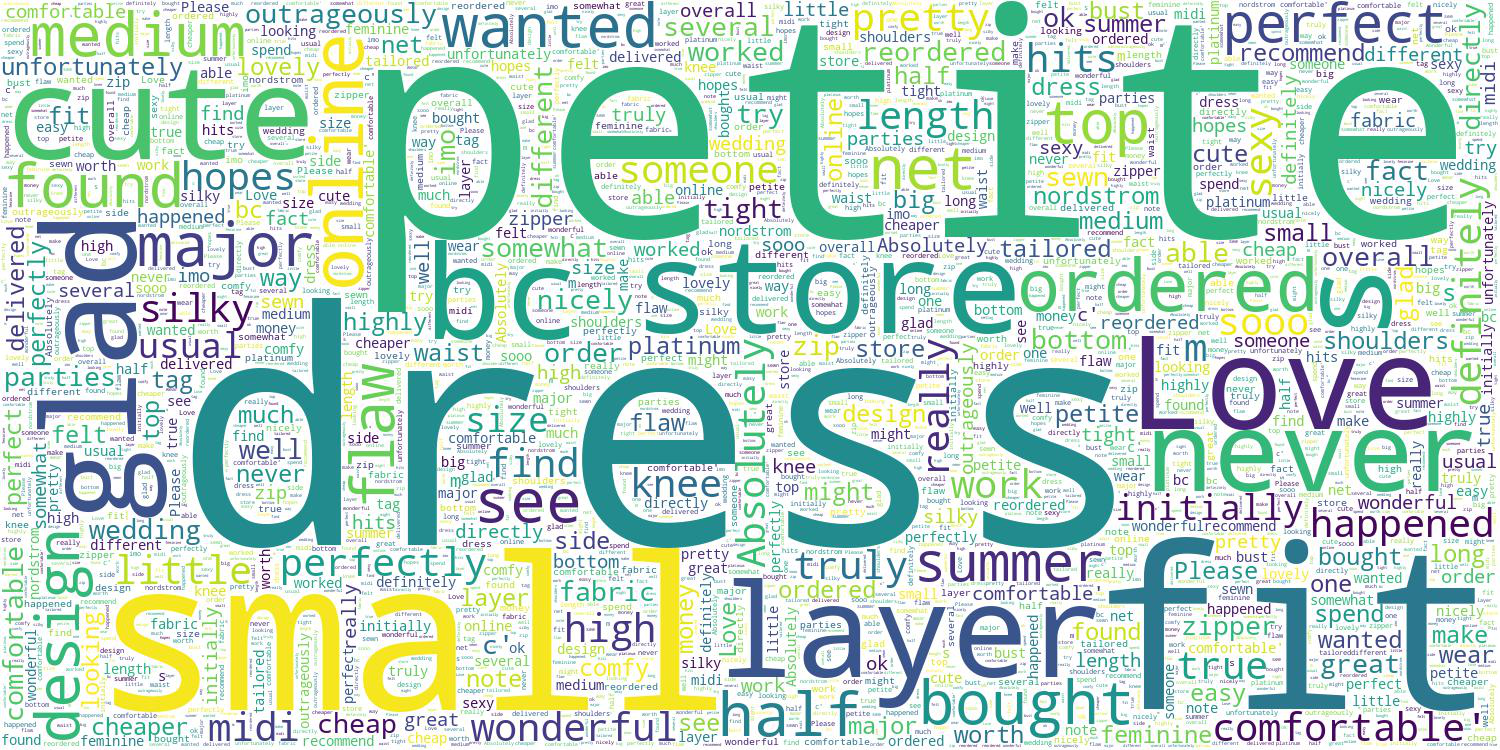

In [20]:
create_wordcloud(np.array(positive_list))

Word Cloud Saved Successfully


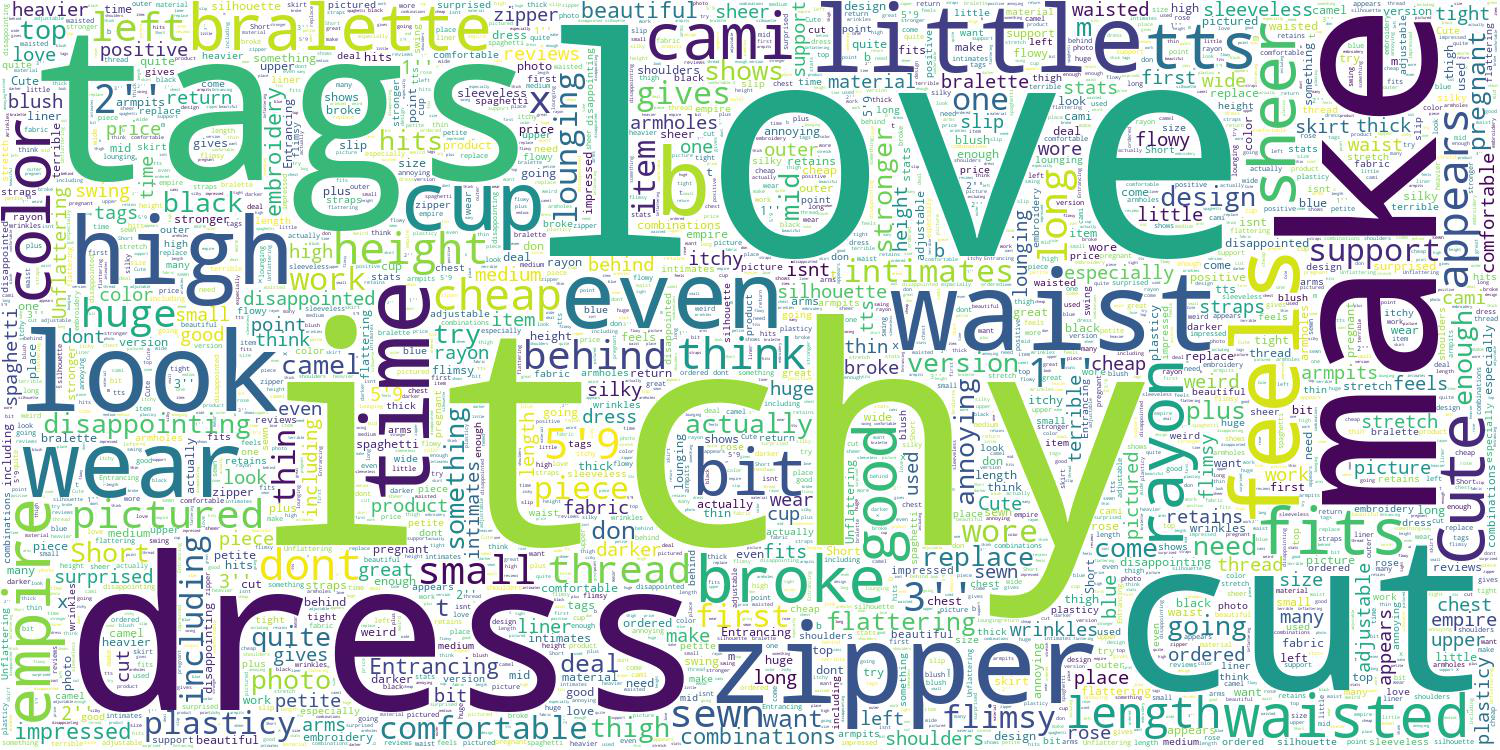

In [34]:
create_wordcloud(np.array(negative_list))

In [21]:
# Create DUMMY variables

new_data = pd.get_dummies(data, columns = ['Division Name','Class Name','Department Name'],drop_first=True)

In [22]:
new_data.drop(columns = ['ID','customer_review','Age','Clothing ID'], inplace= True)
new_data.head(10)

Rating  Recommended IND  Positive Feedback Count  \
0       4                1                        0   
1       5                1                        4   
2       3                0                        0   
3       5                1                        0   
4       5                1                        6   
5       2                0                        4   
6       5                1                        1   
7       4                1                        4   
8       5                1                        0   
9       5                1                        0   

   Division Name_General Petite  Division Name_Initmates  \
0                             0                        1   
1                             0                        0   
2                             0                        0   
3                             1                        0   
4                             0                        0   
5                             0                        0   
6                             1                        0   
7                             1                        0   
8                             0                        0   
9                             0                        0   

   Class Name_Casual bottoms  Class Name_Chemises  Class Name_Dresses  \
0                          0                    0                   0   
1                          0                    0                   1   
2                          0                    0                   1   
3                          0                    0                   0   
4                          0                    0                   0   
5                          0                    0                   1   
6                          0                    0                   0   
7                          0                    0                   0   
8                          0                    0                   1   
9                          0                    0                   1   

   Class Name_Fine gauge  Class Name_Intimates  ...  Class Name_Skirts  \
0                      0                     1  ...                  0   
1                      0                     0  ...                  0   
2                      0                     0  ...                  0   
3                      0                     0  ...                  0   
4                      0                     0  ...                  0   
5                      0                     0  ...                  0   
6                      0                     0  ...                  0   
7                      0                     0  ...                  0   
8                      0                     0  ...                  0   
9                      0                     0  ...                  0   

   Class Name_Sleep  Class Name_Sweaters  Class Name_Swim  Class Name_Trend  \
0                 0                    0                0                 0   
1                 0                    0                0                 0   
2                 0                    0                0                 0   
3                 0                    0                0                 0   
4                 0                    0                0                 0   
5                 0                    0                0                 0   
6                 0                    0                0                 0   
7                 0                    0                0                 0   
8                 0                    0                0                 0   
9                 0                    0                0                 0   

   Department Name_Dresses  Department Name_Intimate  Department Name_Jackets  \
0                        0                         1                        0   
1                        1                         0                        0   
2   

In [23]:
# Separate independent and dependent variables
X = new_data.drop(columns=['Recommended IND'])
Y = new_data['Recommended IND']                           # Dependent variable

In [24]:
# Scaling the dataset:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [25]:
# Split into TRAIN and TEST dataset

from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(scaled_X,Y,train_size=0.80)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((18103, 28), (4526, 28), (18103,), (4526,))

In [26]:
# Model Building, Predictions

from sklearn.linear_model import LogisticRegression as LR
classifier = LR(class_weight = 'balanced')

classifier.fit(x_train, y_train)
predicted_values = classifier.predict(x_test)
predicted_probabilities = classifier.predict_proba(x_test)

predicted_probabilities, predicted_probabilities.shape

(array([[0.83671411, 0.16328589],
        [0.00681455, 0.99318545],
        [0.00751995, 0.99248005],
        ...,
        [0.00553301, 0.99446699],
        [0.00637748, 0.99362252],
        [0.17676482, 0.82323518]]),
 (4526, 2))

In [27]:
# Accuracy of the Logistic Regression model

classifier.score(x_test, y_test)

0.931064958020327

In [28]:
# PRECISION of the model

from sklearn.metrics import precision_score
Precision = precision_score(y_test,predicted_values)
Precision

0.989705461824421

In [29]:
# RECALL of the model

from sklearn.metrics import recall_score
Recall = recall_score(y_test, predicted_values)
Recall

0.9261439657479261

In [30]:
# F1-score of the model

from sklearn.metrics import f1_score
F1 = f1_score(y_test, predicted_values)
F1

0.9568703345313796

In [31]:
# calculate precision, recall, f1-score, support - all at once
from sklearn.metrics import precision_recall_fscore_support as PRF_summary
precision, recall, f1, support = PRF_summary(y_test, predicted_values)
precision, recall, f1, support

(array([0.73177843, 0.98970546]),
 array([0.95437262, 0.92614397]),
 array([0.82838284, 0.95687033]),
 array([ 789, 3737], dtype=int64))

In [32]:
# Using classification_report function

from sklearn.metrics import classification_report
k = classification_report(y_test, predicted_values)
print(k)

              precision    recall  f1-score   support

           0       0.73      0.95      0.83       789
           1       0.99      0.93      0.96      3737

    accuracy                           0.93      4526
   macro avg       0.86      0.94      0.89      4526
weighted avg       0.94      0.93      0.93      4526



In [33]:
# Precision/Recall scores for different thresholds

from sklearn.metrics import precision_recall_curve
precision_points, recall_points, threshold_points = precision_recall_curve(y_test,predicted_probabilities[:,1])
precision_points.shape,recall_points.shape,threshold_points.shape

((919,), (919,), (918,))